In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
train= pd.read_csv("train.csv")
test= pd.read_csv("test.csv")
data = pd.concat([train,test],ignore_index=True)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
data.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,0-17,A,F,0,10,3,NaN,NaN,P00069042,8370.0,2,1000001
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001
2,0-17,A,F,0,10,12,NaN,NaN,P00087842,1422.0,2,1000001
3,0-17,A,F,0,10,12,14.0,NaN,P00085442,1057.0,2,1000001
4,55+,C,M,0,16,8,NaN,NaN,P00285442,7969.0,4+,1000002


In [4]:
data.shape

(783667, 12)

In [5]:
data.dtypes

Age                            object
City_Category                  object
Gender                         object
Marital_Status                  int64
Occupation                      int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Product_ID                     object
Purchase                      float64
Stay_In_Current_City_Years     object
User_ID                         int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
Age                           783667 non-null object
City_Category                 783667 non-null object
Gender                        783667 non-null object
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            537685 non-null float64
Product_Category_3            237858 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null object
User_ID                       783667 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [7]:
data.describe()

,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_ID
count,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000,7.836670e+05
mean,0.409777,8.079300,5.366196,9.844506,12.668605,9263.968713,1.003029e+06
std,0.491793,6.522206,3.878160,5.089093,4.125510,5023.065394,1.727267e+03
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000,1.000001e+06
25%,0.000000,2.000000,1.000000,5.000000,9.000000,5823.000000,1.001519e+06
50%,0.000000,7.000000,5.000000,9.000000,14.000000,8047.000000,1.003075e+06
75%,1.000000,14.000000,8.000000,15.000000,16.000000,12054.000000,1.004478e+06
max,1.000000,20.000000,20.000000,18.000000,18.000000,23961.000000,1.006040e+06


In [8]:
data.isnull().sum()

Age                                0
City_Category                      0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Product_ID                         0
Purchase                      233599
Stay_In_Current_City_Years         0
User_ID                            0
dtype: int64

In [9]:
data['Gender'] = data['Gender'].map( {'M': 1, 'F': 0} ).astype(int)

In [10]:
data.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,0-17,A,0,0,10,3,NaN,NaN,P00069042,8370.0,2,1000001
1,0-17,A,0,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001
2,0-17,A,0,0,10,12,NaN,NaN,P00087842,1422.0,2,1000001
3,0-17,A,0,0,10,12,14.0,NaN,P00085442,1057.0,2,1000001
4,55+,C,1,0,16,8,NaN,NaN,P00285442,7969.0,4+,1000002


In [11]:
City_Category = np.unique(data['City_Category'])
City_Category

array(['A', 'B', 'C'], dtype=object)

In [12]:
data['City_Category'] = data['City_Category'].map( {'A':1,'B':2,'C':3}).astype(int)

In [13]:
data.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,0-17,1,0,0,10,3,NaN,NaN,P00069042,8370.0,2,1000001
1,0-17,1,0,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001
2,0-17,1,0,0,10,12,NaN,NaN,P00087842,1422.0,2,1000001
3,0-17,1,0,0,10,12,14.0,NaN,P00085442,1057.0,2,1000001
4,55+,3,1,0,16,8,NaN,NaN,P00285442,7969.0,4+,1000002


In [14]:
Age= np.unique(data['Age'])
Age

array(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],
      dtype=object)

In [15]:
data['Age'] = data['Age'].map( {'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7}).astype(int)

In [16]:
data.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,1,1,0,0,10,3,NaN,NaN,P00069042,8370.0,2,1000001
1,1,1,0,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001
2,1,1,0,0,10,12,NaN,NaN,P00087842,1422.0,2,1000001
3,1,1,0,0,10,12,14.0,NaN,P00085442,1057.0,2,1000001
4,7,3,1,0,16,8,NaN,NaN,P00285442,7969.0,4+,1000002


In [17]:
Product_Category_1= np.unique(data['Product_Category_1'])
Product_Category_1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int64)

In [18]:
data.drop('User_ID', axis=1, inplace=True)

In [19]:
data.drop('Product_ID', axis=1, inplace=True)

In [20]:
city_stay = np.unique(data['Stay_In_Current_City_Years'])
city_stay

array(['0', '1', '2', '3', '4+'], dtype=object)

In [21]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].map( {'0':0,'1':1,'2':2,'3':3,'4+':4}).astype(int)

In [22]:
data.head(10)

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years
0,1,1,0,0,10,3,NaN,NaN,8370.0,2
1,1,1,0,0,10,1,6.0,14.0,15200.0,2
2,1,1,0,0,10,12,NaN,NaN,1422.0,2
3,1,1,0,0,10,12,14.0,NaN,1057.0,2
4,7,3,1,0,16,8,NaN,NaN,7969.0,4
5,3,1,1,0,15,1,2.0,NaN,15227.0,3
6,5,2,1,1,7,1,8.0,17.0,19215.0,2
7,5,2,1,1,7,1,15.0,NaN,15854.0,2
8,5,2,1,1,7,1,16.0,NaN,15686.0,2
9,3,1,1,1,20,8,NaN,NaN,7871.0,1


In [23]:
data['Product_Category_2'] = data['Product_Category_2'].fillna(data['Product_Category_2'].mean()).astype(int)

In [24]:
data['Product_Category_3'] = data['Product_Category_3'].fillna(data['Product_Category_3'].mean()).astype(int)

In [25]:
data.isnull().sum()

Age                                0
City_Category                      0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
Stay_In_Current_City_Years         0
dtype: int64

In [26]:
data.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years
0,1,1,0,0,10,3,9,12,8370.0,2
1,1,1,0,0,10,1,6,14,15200.0,2
2,1,1,0,0,10,12,9,12,1422.0,2
3,1,1,0,0,10,12,14,12,1057.0,2
4,7,3,1,0,16,8,9,12,7969.0,4


C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


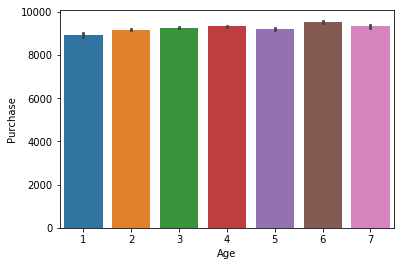

In [27]:
sns.barplot(x='Age', y='Purchase', data=data)

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


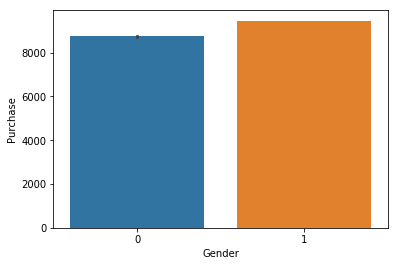

In [28]:
sns.barplot(x='Gender', y='Purchase', data=data)

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


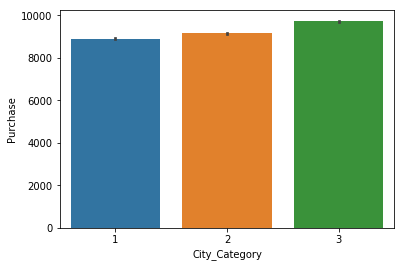

In [29]:
sns.barplot(x='City_Category', y='Purchase', data=data)

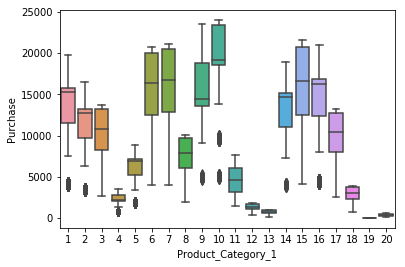

In [30]:
sns.boxplot(x='Product_Category_1', y='Purchase', data=data)

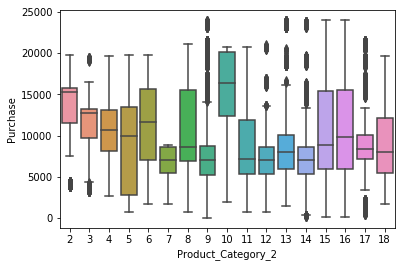

In [31]:
sns.boxplot(x='Product_Category_2', y='Purchase', data=data)

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


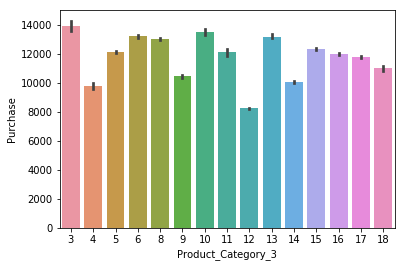

In [32]:
sns.barplot(x='Product_Category_3', y='Purchase', data=data)

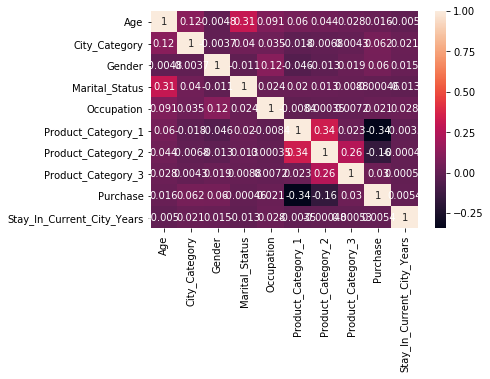

In [42]:
sns.heatmap(
    data.corr(),
    annot=True
)

In [44]:
data.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years
0,1,1,0,0,10,3,9,12,8370.0,2
1,1,1,0,0,10,1,6,14,15200.0,2
2,1,1,0,0,10,12,9,12,1422.0,2
3,1,1,0,0,10,12,14,12,1057.0,2
4,7,3,1,0,16,8,9,12,7969.0,4


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42, stratify=y)


NameError: name 'X' is not defined